Import modules needed for project

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

/Users/jitsen/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Upload tables pertaining to air qulaity and deaths by specific disease

In [8]:
Air_Qual = pd.read_csv('/Users/jitsen/Documents/metis/metisgh/CDC/Air_Qual.csv')

Death_2002 = pd.read_csv('death_2002.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2002['Year'] = 2002
Death_2002['Comp_Year'] = 2001
Death_2003 = pd.read_csv('death_2003.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2003['Year'] = 2003
Death_2003['Comp_Year'] = 2002
Death_2004 = pd.read_csv('death_2004.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2004['Year'] = 2004
Death_2004['Comp_Year'] = 2003
Death_2005 = pd.read_csv('death_2005.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2005['Year'] = 2005
Death_2005['Comp_Year'] = 2004
Death_2006 = pd.read_csv('death_2006.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2006['Year'] = 2006
Death_2006['Comp_Year'] = 2005
Death_2007 = pd.read_csv('death_2007.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2007['Year'] = 2007
Death_2007['Comp_Year'] = 2006
Death_2008 = pd.read_csv('death_2008.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2008['Year'] = 2008
Death_2008['Comp_Year'] = 2007
Death_2009 = pd.read_csv('death_2009.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2009['Year'] = 2009
Death_2009['Comp_Year'] = 2008
Death_2010 = pd.read_csv('death_2010.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2010['Year'] = 2010
Death_2010['Comp_Year'] = 2009
Death_2011 = pd.read_csv('death_2011.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2011['Year'] = 2011
Death_2011['Comp_Year'] = 2010
Death_2012 = pd.read_csv('death_2012.txt',sep='\t', usecols = ["State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code","Age Group Code","Deaths","Population"])
Death_2012['Year'] = 2012
Death_2002['Comp_Year'] = 2011


Import data on diabetes

In [9]:
Diabetes = pd.read_csv('/Users/jitsen/Documents/metis/metisgh/CDC/Diabetes.csv',sep=',', usecols = ['State','County','Prevalence, 1999, Both Sexes',
'Prevalence, 2000, Both Sexes','Prevalence, 2001, Both Sexes','Prevalence, 2002, Both Sexes',
'Prevalence, 2003, Both Sexes','Prevalence, 2004, Both Sexes','Prevalence, 2005, Both Sexes', 
'Prevalence, 2006, Both Sexes','Prevalence, 2007, Both Sexes','Prevalence, 2008, Both Sexes',
'Prevalence, 2009, Both Sexes','Prevalence, 2010, Both Sexes','Prevalence, 2011, Both Sexes',
'Prevalence, 2012, Both Sexes'])  

pandas_dict = {}
Year_list = [(2000,'2000'),(2001,'2001'),(2002,'2002'),(2003,'2003'),(2004,'2004'),
             (2005,'2005'),(2006,'2006'),(2007,'2007'),(2008,'2008'),(2009,'2009'),
             (2010,'2010'),(2011,'2011'),(2012,'2012')]
for k,v in Year_list:
    pandas_dict[k] = Diabetes[['State','County','Prevalence, %r, Both Sexes' %k]]

Diabetes_list = []
Diabetes = pd.DataFrame()
for k,v in pandas_dict.items():
    v['Year'] = k
    v.columns.values[2] = 'Prevalence of Diabetes'
    Diabetes_list.append(v)
Diabetes_Concat = pd.concat(Diabetes_list)
Diabetes_Concat['County'] = Diabetes_Concat['County'].apply(lambda x: x.split()[0])

Import data on poverty

In [15]:
import glob
import errno
import os
path = '/Users/jitsen/Documents/metis/metisgh/CDC/Poverty_Death_D3'
content = []
for filename in glob.glob(os.path.join(path, '*.csv')):
    content.append(filename)
    
Poverty = pd.read_csv(content[0],usecols = ['Year','State / County Name','All Ages in Poverty Percent',
                                           'Median Household Income in Dollars','County ID'])
for i in content[1:]:
    Poverty = pd.concat([Poverty, pd.read_csv(i,usecols = ['Year','State / County Name','All Ages in Poverty Percent',
                                                          'Median Household Income in Dollars','County ID'])])

In [16]:
Poverty['County'] = Poverty['State / County Name'].apply(lambda x : x.split()[0])
Poverty['State'] = Poverty['State / County Name'].apply(lambda x : x.split()[-1][1:3])
states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam',
        'HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky',
        'LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota',
        'MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NA': 'National','NC': 'North Carolina',
        'ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada',
        'NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island',
        'SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia',
        'VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}

Poverty['State'] = Poverty['State'].map(states)

Poverty['Median_Income'] = Poverty['Median Household Income in Dollars'].apply(lambda x : re.sub('[^0-9]','',str(x)))
Poverty['Median_Income'] = pd.to_numeric(Poverty['Median_Income'], errors='coerce')

Merge tables on diabetes and poverty

In [17]:
Diabetes_Poverty= pd.merge(Diabetes_Concat, Poverty,left_on = ['County','Year','State'],
                  right_on = ['County','Year','State'])

Check if Intergerity if tables were preserved

In [18]:
Diabetes_Poverty['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012])

Pick measure for air pollution (P2.5 density)

In [19]:
Air_Qual_2_5 = Air_Qual[Air_Qual['MeasureId']==296]

Merge tables on diabetes and poverty with air quality metric 

In [20]:
Diabetes_Poverty_Air_Qual_2_5 = pd.merge(Diabetes_Poverty,Air_Qual_2_5,
                left_on = ['County','Year','State'], 
                                right_on = ['CountyName','ReportYear','StateName'])

Create squared term on particle density in case relationship with deaths is not linear

In [21]:
Diabetes_Poverty_Air_Qual_2_5['Value_sq'] = Diabetes_Poverty_Air_Qual_2_5['Value'].apply(
lambda x: x**2 )

Create master table with all deaths

In [22]:
Death_concat = pd.concat([Death_2002,Death_2003,Death_2004,Death_2005,Death_2006,Death_2007,Death_2008,
                         Death_2009,Death_2010,Death_2011,Death_2012])

Death_new = Death_concat[["State","State Code","County","County Code","2013 Urbanization",
                           "2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code",
                           "Age Group Code","Deaths","Population","Year","Comp_Year"]]
Death_new['County'] = Death_new.County.str.split().str[0]
cols = ["State","State Code","County","County Code","2013 Urbanization",
                           "2013 Urbanization Code","ICD Sub-Chapter","ICD Sub-Chapter Code",
                           "Age Group Code","Deaths","Population","Year","Comp_Year"]

Death_new = Death_new.loc[:, cols].dropna()


Merge death counts data with all other features

In [23]:
Death_DPA_merge = pd.merge(Diabetes_Poverty_Air_Qual_2_5, Death_new,left_on = ['StateName','CountyName','ReportYear'],
                          right_on = ['State','County','Comp_Year'])


Select Ischaemic HEart Disease (IHD as cause of death)

In [24]:
Death_DPA_merge['Population'] = Death_DPA_merge['Population'].astype('int')
Death_DPA_merge['prop_death'] = Death_DPA_merge['Deaths']/Death_DPA_merge['Population']
Death_DPA_merge = Death_DPA_merge[Death_DPA_merge['Age Group Code'] != '85+']
Death_DPA_merge['Age Group Code'] = Death_DPA_merge['Age Group Code'].apply(
lambda x : (int(x[3:5])+int(x[0:2]))/2)
Death_DPA_merge
Death_DPA_merge_IHD = Death_DPA_merge[Death_DPA_merge['ICD Sub-Chapter'] == 'Ischaemic heart diseases']

Add geo-coordinates to master dataframe

In [25]:
Geo_coord = pd.read_csv('/Users/jitsen/Documents/metis/metisgh/CDC/zip_codes_states.csv')
Geo_coord['state'] = Geo_coord['state'].map(states)
Geo_coord_mean = Geo_coord.groupby(['state','county',]).mean()
Geo_coord_mean = Geo_coord_mean.reset_index()
Death_m_concat_geo = pd.merge(Death_DPA_merge_IHD,Geo_coord_mean, left_on = ['State_x','County_x'],
                              right_on = ['state','county'])


Add interaction terms to see if that helps predictive power

In [26]:
Death_m_concat_geo['Value_Age']  = Death_m_concat_geo['Value']*Death_m_concat_geo['Age Group Code']
Death_m_concat_geo['Value_Poverty'] = Death_m_concat_geo['Value']*Death_m_concat_geo['All Ages in Poverty Percent']

Create function to control for features which act as confounders

In [27]:
def cause(age_group, metro):   
    #new_df5 = new_df5[new_df5['Value'] < 40]
    df = Death_m_concat_geo[Death_m_concat_geo['Age Group Code'] == age_group]
    #new_df2['Prop_death'] = new_df2['Prop_death'].apply(lambda x : np.log(x))
    df = df[df['2013 Urbanization'] == metro]
    new_list = [x for x in zip(df['prop_death'],df['Value_sq'])]
    new_list2 = sorted(new_list, key=lambda x: x[1])
    return new_list2

Having controlled for confounders, plot relationship between particle matter density number of deaths

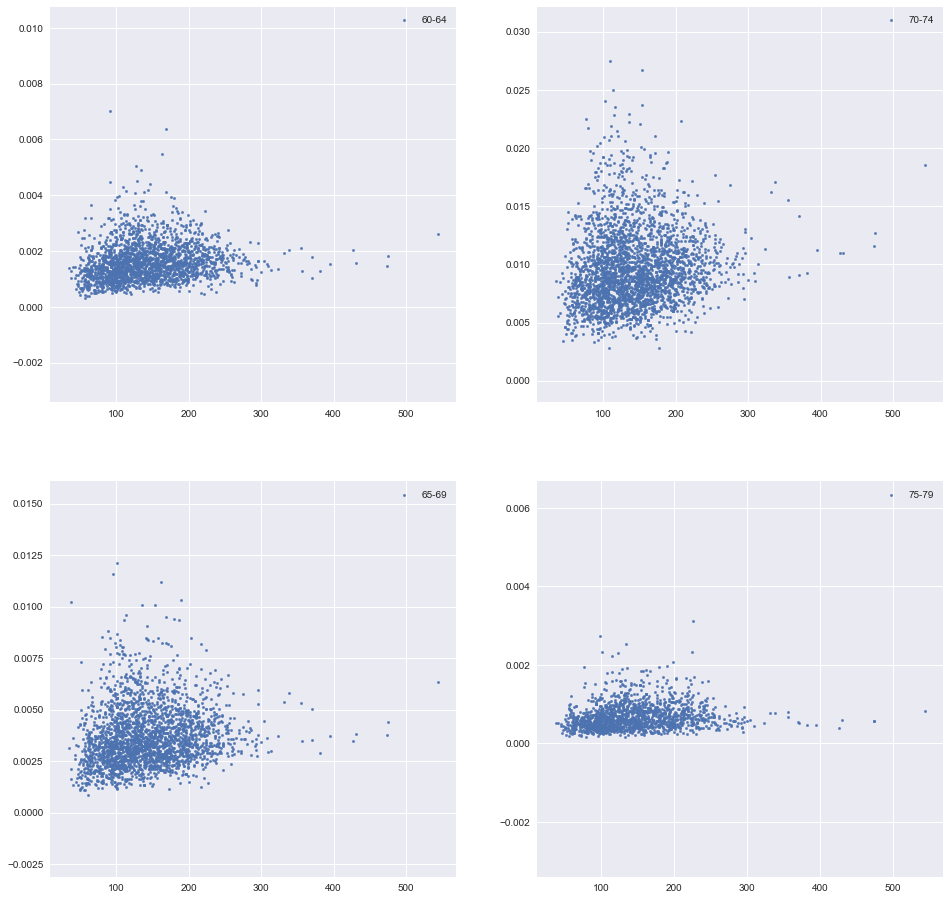

In [28]:
fig, axes = plt.subplots(2, 2, figsize = (16,16));
axes[0,0].scatter([x[1] for x in cause(59.5, 'Medium Metro') ],[x[0] for x in cause(59.5, 'Medium Metro')], 
            label = '60-64',s=6);
axes[1,0].scatter([x[1] for x in cause(69.5, 'Medium Metro') ],[x[0] for x in cause(69.5, 'Medium Metro')], 
            label = '65-69',s=6);
axes[0,1].scatter([x[1] for x in cause(79.5, 'Medium Metro') ],[x[0] for x in cause(79.5, 'Medium Metro')], 
            label = '70-74', s=6);
axes[1,1].scatter([x[1] for x in cause(49.5, 'Medium Metro') ],[x[0] for x in cause(49.5, 'Medium Metro')], 
            label = '75-79', s=6);

axes[0,0].legend();
axes[0,1].legend();
axes[1,0].legend();
axes[1,1].legend();
plt.show();

Try K-Means as a method of controlling for confounders as well.

In [29]:
X = Death_m_concat_geo[['Comp_Year','Prevalence of Diabetes','Median_Income',
       'All Ages in Poverty Percent','2013 Urbanization Code','Age Group Code',
      'Population','latitude', 'longitude','Value_Age','Value_Poverty']]

scaler = MinMaxScaler(feature_range=(0, 1))
X_ = scaler.fit_transform(X)
k_means = cluster.KMeans(n_clusters=80)
X_fit = k_means.fit(X_)
labels = X_fit.labels_
Death_m_concat_geo['clusters'] = labels

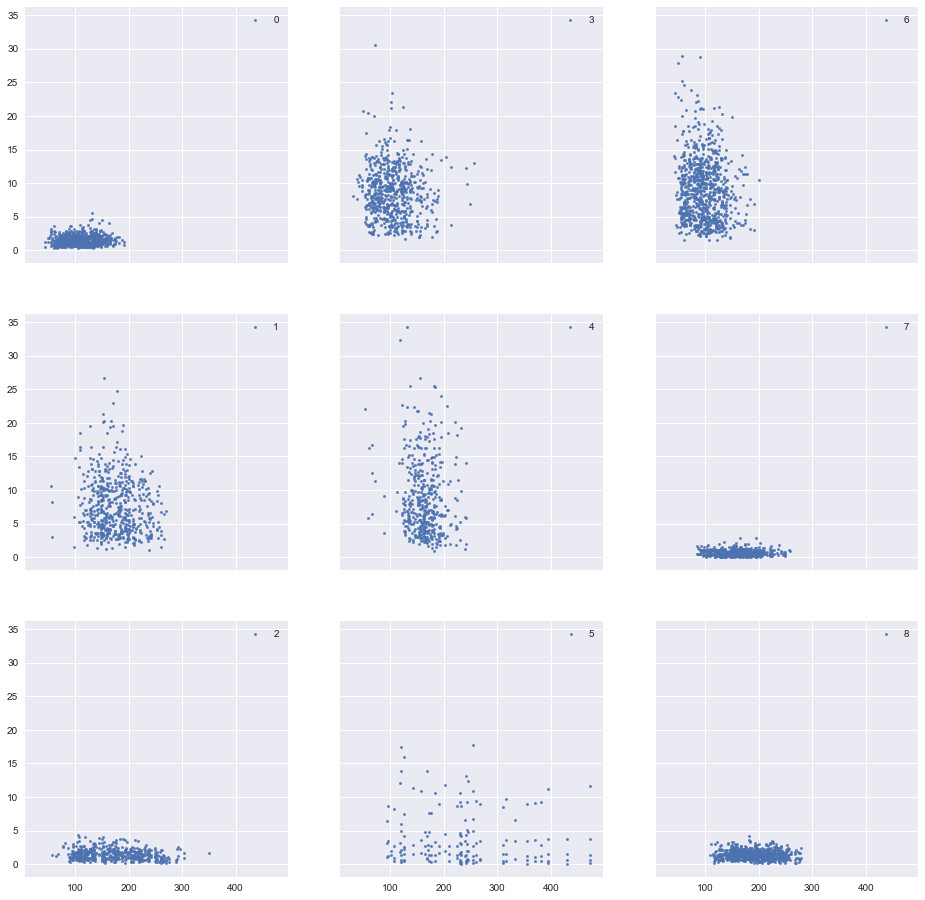

In [30]:
def cause_3(cluster):   
    df = Death_m_concat_geo[Death_m_concat_geo['clusters'] == cluster]
    #new_df5 = new_df5[new_df5['Value'] < 40]
    #new_df2['Prop_death'] = new_df2['Prop_death'].apply(lambda x : np.log(x))
    new_list = [x for x in zip(df['prop_death']*1000,df['Value_sq'])]
    new_list2 = sorted(new_list, key=lambda x: x[1])
    return new_list2

fig, axes = plt.subplots(3, 3, figsize = (16,16), sharey=True, sharex = True);
axes[0,0].scatter([x[1] for x in cause_3(0) ],[x[0] for x in cause_3(0)], 
            label = '0',s=6);
axes[1,0].scatter([x[1] for x in cause_3(1) ],[x[0] for x in cause_3(1)], 
            label = '1',s=6);
axes[2,0].scatter([x[1] for x in cause_3(2) ],[x[0] for x in cause_3(2)], 
            label = '2', s=6);
axes[0,1].scatter([x[1] for x in cause_3(3) ],[x[0] for x in cause_3(3)], 
            label = '3', s=6);
axes[1,1].scatter([x[1] for x in cause_3(4) ],[x[0] for x in cause_3(4)], 
            label = '4', s=6);
axes[2,1].scatter([x[1] for x in cause_3(5) ],[x[0] for x in cause_3(5)], 
            label = '5', s=6);
axes[0,2].scatter([x[1] for x in cause_3(6) ],[x[0] for x in cause_3(6)], 
            label = '6', s=6);
axes[1,2].scatter([x[1] for x in cause_3(7) ],[x[0] for x in cause_3(7)], 
            label = '7', s=6);
axes[2,2].scatter([x[1] for x in cause_3(8) ],[x[0] for x in cause_3(8)], 
            label = '8', s=6);
axes[0,0].legend();
axes[1,0].legend();
axes[2,0].legend();
axes[0,1].legend();
axes[1,1].legend();
axes[2,1].legend();
axes[0,2].legend();
axes[1,2].legend();
axes[2,2].legend();

plt.show();

Plot distribution of deaths to ensure Poisson distrbution is the ebst method to proceed with

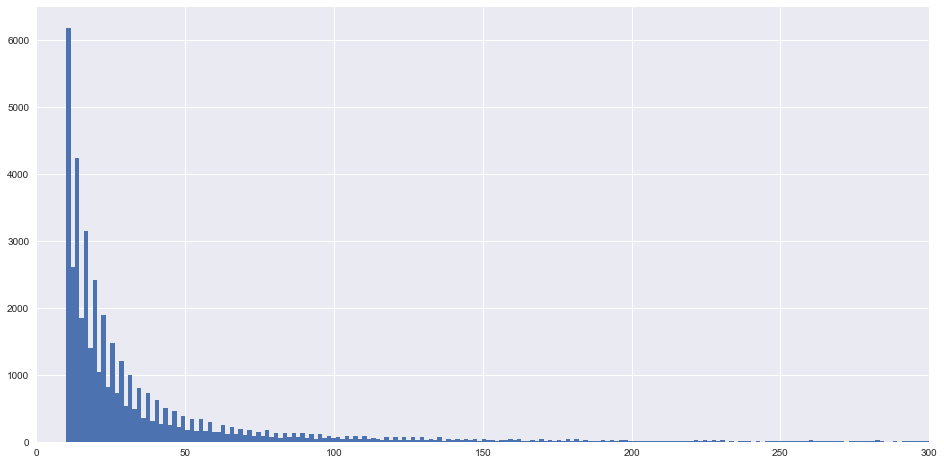

In [31]:
plt.figure(figsize = (16,8));
plt.hist(Death_m_concat_geo['Deaths'],bins=2000);
plt.xlim(0,300);
plt.show();

Run Poisson model on Data

In [32]:
X_sm = Death_m_concat_geo[['Year_x','Prevalence of Diabetes',
       'All Ages in Poverty Percent','Value','2013 Urbanization Code',
       'latitude', 'longitude','Population','Age Group Code']]

X_sm_spec = X_sm[(X_sm['Age Group Code']>=1)&
                (X_sm['Population']>=1)&(X_sm['Population']<=1000000) &
                (X_sm['Value']>=1)]

y_sm_spec  = Death_m_concat_geo[(Death_m_concat_geo['Age Group Code']>=1)&
                               (Death_m_concat_geo['Population']>=1)&(Death_m_concat_geo['Population']<=1000000)
                               & (X_sm['Value']>=1)]

y_sm_spec = y_sm_spec['prop_death']*100000

scaler = MinMaxScaler(feature_range=(0, 1))
X_sm_t = scaler.fit_transform(X_sm_spec)

#X_sm_t = pd.DataFrame(X_sm_t, columns = ["Year","Five-Year Age Groups",'Median_Income',
#                   'All Ages in Poverty Percent','Prevalence of Diabetes',
#'2013 Urbanization Code','Value'])
X_sm_t_new = sm.add_constant(X_sm_t)

X_train, X_test, y_train, y_test = train_test_split(X_sm_t_new, y_sm_spec, test_size = .3)

sm_pois = sm.GLM(y_train,X_train, family =  Poisson()).fit_regularized()
sm_pois.params

const    3.720011
x1      -0.262012
x2       0.496704
x3       0.444604
x4      -0.033733
x5       0.192228
x6      -0.057897
x7      -0.013356
x8      -5.781726
x9       2.954471
dtype: float64

In [33]:
X_sm.corr()

,Year_x,Prevalence of Diabetes,All Ages in Poverty Percent,Value,2013 Urbanization Code,latitude,longitude,Population,Age Group Code
Year_x,1.000000,0.446538,0.235111,-0.383057,-0.011013,-0.001242,0.002171,0.014188,-0.006939
Prevalence of Diabetes,0.446538,1.000000,0.745779,0.017073,0.117885,-0.486011,0.121708,-0.052867,-0.007864
All Ages in Poverty Percent,0.235111,0.745779,1.000000,-0.138560,0.345122,-0.376884,-0.096766,-0.085759,0.046675
Value,-0.383057,0.017073,-0.138560,1.000000,-0.234507,-0.032116,0.270106,0.138718,-0.111796
2013 Urbanization Code,-0.011013,0.117885,0.345122,-0.234507,1.000000,0.026426,-0.070708,-0.455177,0.309358
latitude,-0.001242,-0.486011,-0.376884,-0.032116,0.026426,1.000000,-0.032013,-0.004301,0.038083
longitude,0.002171,0.121708,-0.096766,0.270106,-0.070708,-0.032013,1.000000,0.005999,-0.039929
Population,0.014188,-0.052867,-0.085759,0.138718,-0.455177,-0.004301,0.005999,1.000000,-0.466048
Age Group Code,-0.006939,-0.007864,0.046675,-0.111796,0.309358,0.038083,-0.039929,-0.466048,1.000000


Find pseudo-R^2 for GLM model

In [34]:
y_pred = sm_pois.predict(X_test)

def r2(a,b):
    SSE = 0
    SST = 0
    for i, j in zip(a,b):
        SSE += (j - i)**2
        SST += (i - a.mean())**2 
    return 1 - SSE/SST

r2(y_test,y_pred)

0.71936443886862711

Predict death counts using linear model as well

In [35]:
Death_m_concat_geo_2 = Death_m_concat_geo[Death_m_concat_geo['Age Group Code']>=1]

X_lr_1 = Death_m_concat_geo_2[['Year_x','Prevalence of Diabetes',
       'All Ages in Poverty Percent', 'Value','2013 Urbanization Code',
       'latitude', 'longitude','Population','Age Group Code']]

X_lr_2 = Death_m_concat_geo_2[['Year_x','Prevalence of Diabetes',
       'All Ages in Poverty Percent','2013 Urbanization Code',
       'latitude', 'longitude','Population','Age Group Code']]

X_lr_3 = Death_m_concat_geo_2[['Value']]

y_lr = Death_m_concat_geo_2['prop_death']*100000

scaler = MinMaxScaler(feature_range=(0, 1))

X_lr_t1 = scaler.fit_transform(X_lr_1)
X_lr_t2 = scaler.fit_transform(X_lr_2)
X_lr_t3 = scaler.fit_transform(X_lr_3)

lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()

lr1.fit(X_lr_t1, y_lr)
lr2.fit(X_lr_t2, y_lr)
lr3.fit(X_lr_t3, y_lr)

print(lr1.score(X_lr_t1, y_lr),lr2.score(X_lr_t2, y_lr),lr3.score(X_lr_t3, y_lr))

0.647259026752 0.64724096005 0.00388072183262


Try Random Forest Regressor as a predictor

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_lr_1, Death_m_concat_geo_2['prop_death']*100000, test_size=0.3)
for i in range(10)[1:]:    
    rand_forest = RandomForestRegressor(n_estimators=5+i, min_samples_split=2*(i))
    rand_forest.fit(X_train, y_train)
    y_test_pred_rand_forest = rand_forest.predict(X_test)
    print('n_estimators:',(5+i), rand_forest.score(X_test,y_test),
          'min_samples_split:',5*(i), rand_forest.score(X_train, y_train),
         rand_forest.feature_importances_)

n_estimators: 6 0.859645225503 min_samples_split: 5 0.970984221106 [ 0.03708614  0.03192744  0.01997421  0.02015152  0.00581496  0.02398326
  0.02299829  0.12820615  0.70985803]
n_estimators: 7 0.864820892156 min_samples_split: 10 0.968886356614 [ 0.03662031  0.03015586  0.01977002  0.01835915  0.0050276   0.02315342
  0.02229861  0.12929705  0.71531798]
n_estimators: 8 0.868832785417 min_samples_split: 15 0.964334239411 [ 0.03599022  0.02825018  0.01823123  0.0171499   0.00452694  0.02340824
  0.02106462  0.1302776   0.72110107]
n_estimators: 9 0.873421003843 min_samples_split: 20 0.958725862759 [ 0.03667988  0.02862698  0.01663095  0.01524802  0.00454044  0.02225437
  0.0203372   0.12976299  0.72591917]
n_estimators: 10 0.871719197353 min_samples_split: 25 0.954910274524 [ 0.03567365  0.02597328  0.0157841   0.01506684  0.0044691   0.02147805
  0.01930224  0.1311577   0.73109504]
n_estimators: 11 0.871808231085 min_samples_split: 30 0.950161393755 [ 0.03661951  0.02620026  0.01459731

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_lr_2, Death_m_concat_geo_2['prop_death']*100000, test_size=0.3)
for i in range(6)[1:]:    
    rand_forest = RandomForestRegressor(n_estimators=5+i, min_samples_split=5*(i))
    rand_forest.fit(X_train, y_train)
    y_test_pred_rand_forest = rand_forest.predict(X_test)
    print('n_estimators:',(5+i), rand_forest.score(X_test,y_test),
          'min_samples_split:',5*(i), rand_forest.score(X_train, y_train),
         rand_forest.feature_importances_)

n_estimators: 6 0.858915089399 min_samples_split: 5 0.963547110721 [ 0.0373953   0.03351595  0.02160112  0.00591948  0.02539141  0.02531181
  0.13492151  0.71594341]
n_estimators: 7 0.866437081133 min_samples_split: 10 0.949646981687 [ 0.03636114  0.029807    0.0175847   0.00509483  0.02319445  0.0215461
  0.13496856  0.73144322]
n_estimators: 8 0.869963789202 min_samples_split: 15 0.939176623924 [ 0.03650329  0.02674419  0.01442369  0.00405279  0.02285099  0.01919333
  0.13159584  0.74463588]
n_estimators: 9 0.868339859236 min_samples_split: 20 0.931601700223 [ 0.03552112  0.02500397  0.01402847  0.00382298  0.01916588  0.01739715
  0.13401974  0.75104069]
n_estimators: 10 0.871608294239 min_samples_split: 25 0.925231920946 [ 0.03580593  0.02348566  0.01194066  0.00385538  0.01684131  0.01627633
  0.1316128   0.76018193]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_lr_3, Death_m_concat_geo_2['prop_death']*1000, test_size=0.3)
for i in range(6)[1:]:    
    rand_forest = RandomForestRegressor(n_estimators=5+i, min_samples_split=5*(i))
    rand_forest.fit(X_train, y_train)
    y_test_pred_rand_forest = rand_forest.predict(X_test)
    print('n_estimators:',(5+i), rand_forest.score(X_test,y_test),
          'min_samples_split:',5*(i), rand_forest.score(X_train, y_train),
         rand_forest.feature_importances_)

n_estimators: 6 -0.327769687089 min_samples_split: 5 0.396419531347 [ 1.]
n_estimators: 7 -0.21942914967 min_samples_split: 10 0.329862936424 [ 1.]
n_estimators: 8 -0.168052088027 min_samples_split: 15 0.285607766418 [ 1.]
n_estimators: 9 -0.129141832042 min_samples_split: 20 0.254146560846 [ 1.]
n_estimators: 10 -0.112670286945 min_samples_split: 25 0.233547789156 [ 1.]
